<a href="https://colab.research.google.com/github/ZaKSa/HOG_SVM/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HOG_SVM_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/content/sample_data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

anscombe.json
california_housing_test.csv
california_housing_train.csv
mnist_test.csv
mnist_train_small.csv
numbers.csv
README.md



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Новый раздел

In [8]:
f = open(r'/content/sample_data/numbers.csv')
dataset = pd.read_csv(f) 

lines = f.readlines()
data=[]
for line in lines:
    origin, group, label, files = line[2:].split(',')
    data.append((str(origin), str(group), str(label), str(files)))
 

#dataset = json.load(f)
f.close()

dataset.head(40)

,origin,group,label,file
0,chars74k,Fnt,8,/content/drive/MyDrive/chars74k_png/img009-004...
1,chars74k,Fnt,8,/content/drive/MyDrive/chars74k_png/img009-006...
2,chars74k,Fnt,8,/content/drive/MyDrive/chars74k_png/img009-010...
3,chars74k,Fnt,8,/content/drive/MyDrive/chars74k_png/img009-000...
4,chars74k,Fnt,8,/content/drive/MyDrive/chars74k_png/img009-004...
5,chars74k,Fnt,8,/content/drive/MyDrive/chars74k_png/img009-001...
6,chars74k,Fnt,8,/content/drive/MyDrive/chars74k_png/img009-008...
7,chars74k,Fnt,8,/content/drive/MyDrive/chars74k_png/img009-006...
8,chars74k,Fnt,8,/content/drive/MyDrive/chars74k_png/img009-006...
9,chars74k,Fnt,8,/content/drive/MyDrive/chars74k_png/img009-006...


In [9]:
#print( np.array(dataset['file']))
print( np.array(dataset[dataset['label']==0]))

[['chars74k' 'Fnt' 0
  '/content/drive/MyDrive/chars74k_png/img001-00863.png']
 ['chars74k' 'Fnt' 0
  '/content/drive/MyDrive/chars74k_png/img001-00549.png']
 ['chars74k' 'Fnt' 0
  '/content/drive/MyDrive/chars74k_png/img001-01007.png']
 ...
 ['chars74k' 'Fnt' 0
  '/content/drive/MyDrive/chars74k_png/img001-00116.png']
 ['chars74k' 'Fnt' 0
  '/content/drive/MyDrive/chars74k_png/img001-00687.png']
 ['chars74k' 'Fnt' 0
  '/content/drive/MyDrive/chars74k_png/img001-00701.png']]


In [10]:
import cv2
data = np.array(dataset['file'])#.astype('uint8')
img_length = 80
img_array=[]
for i in range(len(data)):
  img=cv2.imread(data[i])
  img_array.append(img)


#data = data.reshape(-1,3,img_length,img_length).transpose([0,2,3,1])


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


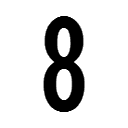

In [11]:
from google.colab.patches import cv2_imshow
print(img_array[0])
cv2_imshow(img_array[0])

In [12]:
print(len(img_array))

10160


None


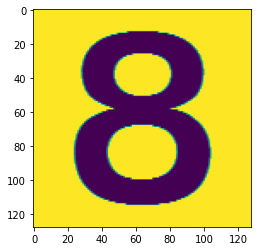

In [13]:
data_gray=[]

for i in img_array:
  if i is not None:
    data_gray.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))
    
#data_gray = [ color.rgb2gray(i) for i in img_array]
plt.imshow(data_gray[100])

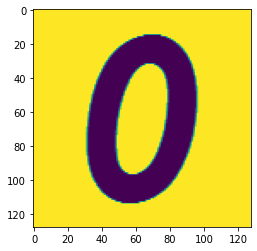

In [14]:
plt.imshow(data_gray[5000])

In [15]:
ppc = 16
hog_images = []
hog_features = []
for image in data_gray:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

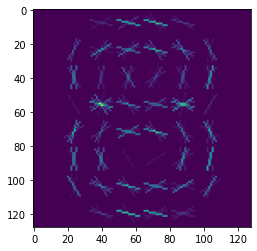

In [16]:
plt.imshow(hog_images[100])


In [38]:
labels =  np.array(dataset['label']).reshape(len(dataset['label']),1)

In [40]:
print(len(labels))

10160


In [96]:
label0=np.array(dataset['label']).reshape(len(dataset['label']),1)

index=[]
for i, img in enumerate(img_array):
  if img is None:
    index.append(i)

label0=np.delete(label0, index)

#label0=np.reshape(len(label0),1)

In [97]:
label0=np.array(label0).reshape(len(label0),1)
print(len(label0))
print(len(label0[0]))
#labels0=np.reshape(len(label0),1)
#print(labels0.shape)

5040
1


In [94]:
print(len(np.array(hog_features)[0]))
print(len(np.array(hog_features)))
print()
print(len(np.array(label0)[0]))
print(len(np.array(label0)))

3200
5040

1
1


In [98]:
clf = svm.SVC()
hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,label0))
np.random.shuffle(data_frame)

In [99]:
#What percentage of data you want to keep for training
percentage = 80
partition = int(len(hog_features)*percentage/100)

In [101]:
x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

print(data_frame[:10,:-1])
clf.fit(x_train,y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


SVC()

In [102]:
print(len(x_train),"\n",len(x_test))

4032 
 1008


In [103]:
y_pred = clf.predict(x_test)

In [104]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))


Accuracy: 0.9930555555555556


              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       122
         1.0       0.95      1.00      0.98       100
         2.0       1.00      0.99      0.99       100
         3.0       0.97      1.00      0.99        70
         4.0       1.00      0.98      0.99       109
         5.0       1.00      1.00      1.00       119
         6.0       1.00      1.00      1.00        98
         7.0       1.00      0.99      0.99        89
         8.0       1.00      1.00      1.00       100
         9.0       1.00      0.98      0.99       101

    accuracy                           0.99      1008
   macro avg       0.99      0.99      0.99      1008
weighted avg       0.99      0.99      0.99      1008



In [105]:
print("Training accuracy:", clf.score(x_train, y_train))
print("Validation accuracy:", clf.score(x_test, y_test))

Training accuracy: 0.9997519841269841
Validation accuracy: 0.9930555555555556
